In [2]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# https://github.com/CornellDataScience/Yelp

In [4]:
data=pd.read_csv("yelp_academic_dataset_tip.csv")

In [5]:
data.head(3)

,business_id,date,likes,text,type,user_id
0,tJRDll5yqpZwehenzE2cSg,2012-07-15,0,Get here early enough to have dinner.,tip,zcTZk7OG8ovAmh_fenH21g
1,jH19V2I9fIslnNhDzPmdkA,2015-08-12,0,Great breakfast large portions and friendly wa...,tip,ZcLKXikTHYOnYt5VYRO5sg
2,dAa0hB2yrnHzVmsCkN4YvQ,2014-06-20,0,Nice place. Great staff. A fixture in the tow...,tip,oaYhjqBbh18ZhU0bpyzSuw


In [6]:
data.describe()

,likes
count,946600.000000
mean,0.016907
std,0.147131
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,15.000000


In [7]:
data.groupby(["type"])["likes"].mean()

type
tip    0.016907
Name: likes, dtype: float64

In [8]:
import csv
import json
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

In [9]:
user=[]
count=0
with open('yelp_academic_dataset_user.json',encoding="utf8") as json_file:
    for line in json_file:
        if count <50000:
            user.append(json.loads(line))
            count=count+1


In [10]:
data_user=pd.DataFrame(user)

In [11]:
#list(data_user)

In [12]:
business=[]
with open('yelp_academic_dataset_tip.json',encoding="utf8") as json_file:
    for line in json_file:
        business.append(json.loads(line))
       
len(business)

946600

In [13]:
business[0:10]

[{'business_id': 'tJRDll5yqpZwehenzE2cSg',
  'date': '2012-07-15',
  'likes': 0,
  'text': 'Get here early enough to have dinner.',
  'type': 'tip',
  'user_id': 'zcTZk7OG8ovAmh_fenH21g'},
 {'business_id': 'jH19V2I9fIslnNhDzPmdkA',
  'date': '2015-08-12',
  'likes': 0,
  'text': 'Great breakfast large portions and friendly waitress. I highly recommend it',
  'type': 'tip',
  'user_id': 'ZcLKXikTHYOnYt5VYRO5sg'},
 {'business_id': 'dAa0hB2yrnHzVmsCkN4YvQ',
  'date': '2014-06-20',
  'likes': 0,
  'text': 'Nice place. Great staff.  A fixture in the township forever',
  'type': 'tip',
  'user_id': 'oaYhjqBbh18ZhU0bpyzSuw'},
 {'business_id': 'dAa0hB2yrnHzVmsCkN4YvQ',
  'date': '2016-10-12',
  'likes': 0,
  'text': 'Happy hour 5-7 Monday - Friday',
  'type': 'tip',
  'user_id': 'ulQ8Nyj7jCUR8M83SUMoRQ'},
 {'business_id': 'SqW3igh1_Png336VIb5DUA',
  'date': '2016-07-03',
  'likes': 0,
  'text': "Come early on Sunday's to avoid the rush",
  'type': 'tip',
  'user_id': 'ulQ8Nyj7jCUR8M83SUMoRQ'},

In [14]:
data=pd.DataFrame(business)

In [15]:
data.head(3)

,business_id,date,likes,text,type,user_id
0,tJRDll5yqpZwehenzE2cSg,2012-07-15,0,Get here early enough to have dinner.,tip,zcTZk7OG8ovAmh_fenH21g
1,jH19V2I9fIslnNhDzPmdkA,2015-08-12,0,Great breakfast large portions and friendly wa...,tip,ZcLKXikTHYOnYt5VYRO5sg
2,dAa0hB2yrnHzVmsCkN4YvQ,2014-06-20,0,Nice place. Great staff. A fixture in the tow...,tip,oaYhjqBbh18ZhU0bpyzSuw


In [16]:
data["likes"].describe()

count    946600.000000
mean          0.016907
std           0.147131
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          15.000000
Name: likes, dtype: float64

In [17]:
# formatter la colonne datetime
data["date"]=pd.to_datetime(data["date"],format="%Y/%m/%d")
data.head(4)

,business_id,date,likes,text,type,user_id
0,tJRDll5yqpZwehenzE2cSg,2012-07-15,0,Get here early enough to have dinner.,tip,zcTZk7OG8ovAmh_fenH21g
1,jH19V2I9fIslnNhDzPmdkA,2015-08-12,0,Great breakfast large portions and friendly wa...,tip,ZcLKXikTHYOnYt5VYRO5sg
2,dAa0hB2yrnHzVmsCkN4YvQ,2014-06-20,0,Nice place. Great staff. A fixture in the tow...,tip,oaYhjqBbh18ZhU0bpyzSuw
3,dAa0hB2yrnHzVmsCkN4YvQ,2016-10-12,0,Happy hour 5-7 Monday - Friday,tip,ulQ8Nyj7jCUR8M83SUMoRQ


In [18]:
data["winter"]=data["date"].apply(lambda x: x.month in (12,1,2)).astype(int)
data["spring"]=data["date"].apply(lambda x: x.month in (3,4,5)).astype(int)
data["summer"]=data["date"].apply(lambda x: x.month in (6,7,8)).astype(int) 
data["autumn"]=data["date"].apply(lambda x: x.month in (9,10,11)).astype(int)

In [20]:
data.head(1)

,business_id,date,likes,text,type,user_id,winter,spring,summer,autumn
0,tJRDll5yqpZwehenzE2cSg,2012-07-15,0,Get here early enough to have dinner.,tip,zcTZk7OG8ovAmh_fenH21g,0,0,1,0


In [21]:
# 0 is Monday, 6 is Sunday
data['dayofweek'] = data.date.dt.dayofweek

In [22]:
data=data.sort_values(by='date');

In [23]:
# variable ("timediff")
earliest = data["date"].min()
data['timediff'] = data['date'].apply(lambda x: x - earliest).astype('timedelta64[D]').astype(int) + 1

In [24]:
data.tail(2)

,business_id,date,likes,text,type,user_id,winter,spring,summer,autumn,dayofweek,timediff
192682,uIE9H0cz2AvxorEqy5cZ0w,2017-01-20,0,They've upgraded their TVs and look in the bar...,tip,_iSOjBuFHuRVTkMqqteAgA,1,0,0,0,4,2838
386421,hEsLl030Ncw10VKCD6g-dg,2017-01-20,0,All you can eat pancakes!,tip,gCiyPyXnwTNpmee9krJfxQ,1,0,0,0,4,2838


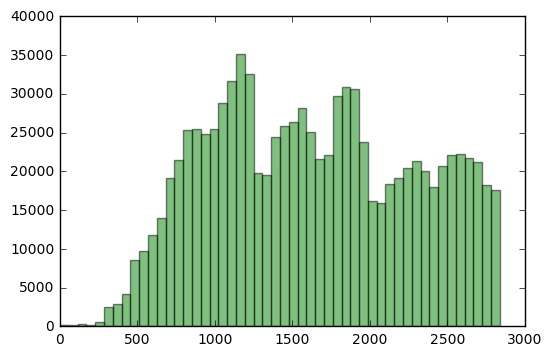

In [25]:
x=data["timediff"]
plt.hist(x, 50, facecolor='green', alpha=0.5)
plt.show()

In [26]:
data["text"]=data['text'].str.lower()

In [27]:
data["text"][0]

'get here early enough to have dinner.'

## filter the bad comments (only 0.2% of the data so it won't run forever) : dataset is "data1"

In [29]:
list1=["nothing bad","not bad","isn't bad","ain't bad"]
list2=["bad","terrible","not good","not nice","not very good","ugly","gross","avoid","stink","awful","alarming","deplorable","disgusting","average","unpleasant","poor"]

l=[]

data1=data.sample(frac=0.002,replace=False)
for i in range(len(data1)):
    if any(word in data1["text"].iloc[[i]].to_string() for word in list1):
        l.append(0)
    elif any(word in data1["text"].iloc[[i]].to_string() for word in list2):
        l.append(1)
    else:
        l.append(0)

## good comments 

In [30]:
ll=[]

list3=["nice","excellent","good","beautiful","great","delicious","outstanding","outstanding","awesome","extra","healthy","gorgeous"]
ll=[]
for i in range(len(data1)):
    if any(word in data1["text"].iloc[[i]].to_string() for word in list1):
        ll.append(0)
    elif any(word in data1["text"].iloc[[i]].to_string() for word in list2):
        ll.append(0)
    elif any(word in data1["text"].iloc[[i]].to_string() for word in list3):
        ll.append(1)
    else:
        ll.append(0)

# try

In [31]:
data1["bad_comment"]=l

In [32]:
data1["good_comment"]=ll

## check the dataset with bad comments 

In [34]:
data1[data1["bad_comment"]==1].head(5)

,business_id,date,likes,text,type,user_id,winter,spring,summer,autumn,dayofweek,timediff,bad_comment,good_comment
834801,LnIO_JtoDS1xLfTHWuV_ug,2014-09-12,0,"salsa, awful and old tasting, service terrible...",tip,fmXpSKwBtAm7haVSW5iATQ,0,0,0,1,4,1977,1,0
814800,RgqetGtygIGTHYhysPLktw,2015-03-01,0,below average food and bad service!,tip,BY_5_nk6kCIEbnXimiW2QQ,0,1,0,0,6,2147,1,0
66267,Mbat8t9X0zPrpxd1mEGRcw,2015-05-14,0,terrible service and nasty food! manager awful...,tip,Z4xC3Fdpd9joZNaLmF6kJQ,0,1,0,0,3,2221,1,0
638472,g62SlImzhs6_1t-knPjd8w,2016-01-03,0,"poor service, waited 15 minutes just for water...",tip,0ho8dx3GoaQytKNPNOrZ4A,1,0,0,0,6,2455,1,0
184872,t53w4JlkxTau-G-TzhSWog,2010-12-15,0,never had bad service here before today...,tip,wzCmGYsfmT-gLLIan9aIfA,1,0,0,0,2,610,1,0


### export data

In [35]:
#data1.to_csv("2percent_with_all_features.csv",encoding="utf-8")

In [36]:
data1.head(1)

,business_id,date,likes,text,type,user_id,winter,spring,summer,autumn,dayofweek,timediff,bad,bad_comment
729046,pucWlGXJZ4kdAxQN2jkIpA,2012-09-21,0,go through front entrance. accidentally went t...,tip,TEwBaV0WxQON_pNOCRh6wg,0,0,0,1,4,1256,go through front entrance. accidentally went t...,0


In [ ]:
"""
for i in range(len(data1)):
    if any(word in data1["text"].iloc[[i]].to_string() for word in list1):
        l.append(0)
    elif any(word in data1["text"].iloc[[i]].to_string() for word in list2):
        l.append(1)
    else:
        l.append(0)
"""

In [39]:
l_clos=["clos","empty"]
l_closeto=["close to","close at"]
l=[]
count=0
for i in range(len(data1)):
    if any(word in data1["text"].iloc[[i]].to_string() for word in l_closeto):
        l.append(0)
    elif any(word in data1["text"].iloc[[i]].to_string() for word in l_clos):
        l.append(1)
    else:
        l.append(0)

In [40]:
data1["closed"]=l

### export

In [42]:
#data1.to_csv("2percent_with_all_features.csv",encoding="utf-8")

In [46]:
data1[data1["closed"]==1].head(1)

,business_id,date,likes,text,type,user_id,winter,spring,summer,autumn,dayofweek,timediff,bad_comment,good_comment,closed
528770,lYMBCn3zvn_zsCmCBAUZxQ,2014-06-08,0,this restaurant is closed,tip,L_O0mcR9ALWwoXw_e-1y0A,0,0,1,0,6,1881,0,0,1


In [47]:
data_byid=data1[["business_id","bad_comment","good_comment","closed"]]
data_byid=data_byid.groupby("business_id").sum()

In [48]:
data_byid.head(3)

,bad_comment,good_comment,closed
business_id,,,
--9e1ONYQuAa-CB_Rrw7Tw,0,0,0
--cZ6Hhc9F7VkKXxHMVZSQ,0,0,0
-0mm8pqBSIOYZQHeo8XnkA,0,0,0


In [56]:
data_byid[data_byid["closed"]>0].head()

,bad_comment,good_comment,closed
business_id,,,
-BS4aZAQm9u41YnB9MUASA,0,0,1
4lgsEQ_ceLhnPiikEPdULQ,0,0,1
66VUcHJlDmRANxSb9skvMA,0,0,1
89uU51kOiQXbJHVA3C6XMQ,0,0,1
A8CbZwWOPsd_9wrJlv94Lw,0,0,1


In [57]:
data_closed=data1[["business_id","closed"]]

In [58]:
data_closed=data_closed[data_closed["closed"]>0]

In [59]:
data_closed=data_closed.groupby("business_id").sum();

In [60]:
data_closed.describe()

,closed
count,20.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [61]:
data1.head(1)

,business_id,date,likes,text,type,user_id,winter,spring,summer,autumn,dayofweek,timediff,bad_comment,good_comment,closed
757445,9XcWAcp1dCpcLcHTBENn-Q,2013-02-21,0,some of the best tom yum noodle soup in town!,tip,W6CdNfqkQby6tSLJHJH4Tw,1,0,0,0,3,1409,0,0,0


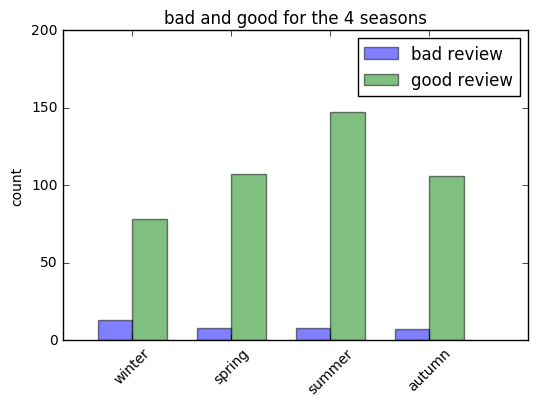

In [62]:
cas_1=data1[data1["winter"]==1]["bad_comment"]
cas_2=data1[data1["spring"]==1]["bad_comment"]
cas_3=data1[data1["summer"]==1]["bad_comment"]
cas_4=data1[data1["autumn"]==1]["bad_comment"]

reg_1=data1[data1["winter"]==1]["good_comment"]
reg_2=data1[data1["spring"]==1]["good_comment"]
reg_3=data1[data1["summer"]==1]["good_comment"]
reg_4=data1[data1["autumn"]==1]["good_comment"]


fig = plt.figure()
ax = fig.add_subplot(111)


N = 4
casual = [cas_1.sum(), cas_2.sum(),cas_3.sum(),cas_4.sum()]
registered = [reg_1.sum(), reg_2.sum(),reg_3.sum(),reg_4.sum()]


ind = np.arange(N)                
width = 0.35                      


rects1 = ax.bar(ind, casual, width,
                color='blue',alpha=0.5,
                error_kw=dict(elinewidth=2,ecolor='green'))

rects2 = ax.bar(ind+width, registered, width,
                    color='green',alpha=0.5,
                    error_kw=dict(elinewidth=2,ecolor='blue'))


ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,200)
ax.set_ylabel('count')
ax.set_title('bad and good for the 4 seasons')
xTickMarks = ["winter","spring","summer","autumn"]
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10)

## add a legend
ax.legend( (rects1[0], rects2[0]), ('bad review', 'good review') )

plt.show()

In [63]:
data_closed.head()

,closed
business_id,
-BS4aZAQm9u41YnB9MUASA,1
4lgsEQ_ceLhnPiikEPdULQ,1
66VUcHJlDmRANxSb9skvMA,1
89uU51kOiQXbJHVA3C6XMQ,1
A8CbZwWOPsd_9wrJlv94Lw,1
